# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2813]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [2814]:
# Let's confirm that the data has been split correctly
# Inspect the shapes of the datasets

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [2815]:
# one hot coding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


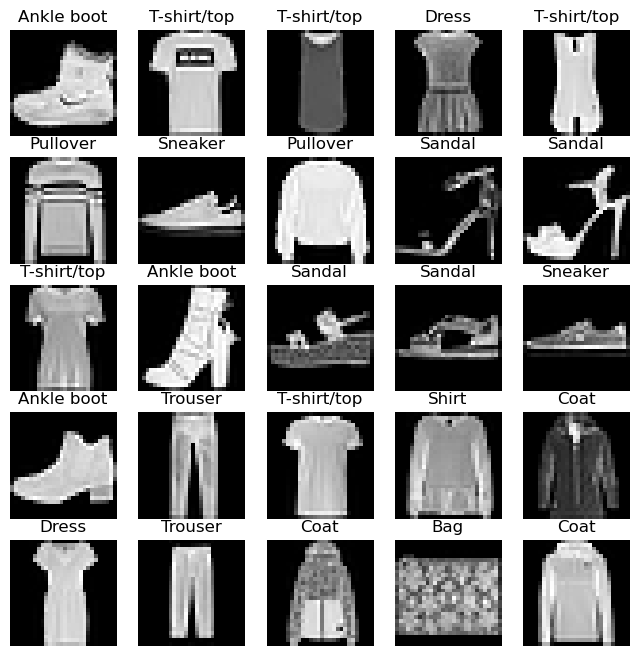

In [2816]:
# Let visualize few images with their label
import matplotlib.pyplot as plt
import numpy as np

y_train_labels = np.argmax(y_train_cat, axis=1)
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1 )
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train_labels[i]])
    # Removing axis labels
    plt.axis('off')
plt.show() 

<Figure size 800x800 with 0 Axes>

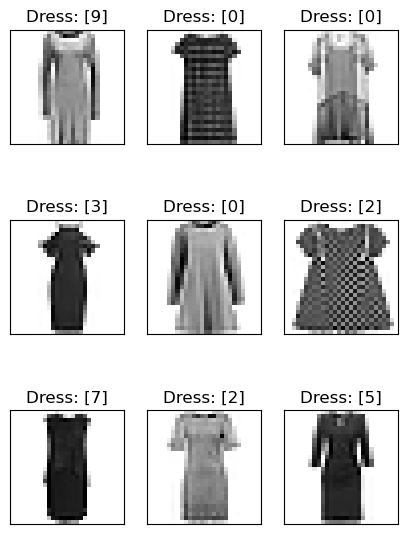

In [2817]:
# Selecting 10 random indices of images labelled as Dress

# Class Label ="T-shirt/top = 0", "Trouser = 1", "Pullover = 2", "Dress = 3", "Coat=4", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# if you change target_label number, you get random image of that number e.g if target_label = 0, you will see random T-shirt  images
# target Class (dress =3)
import matplotlib.pyplot as flat
import numpy as np
dress_indices = np.where(y_train_labels == target_label)[0]
# select randomly 10 indices of Dress
random_indices = np.random.choice(dress_indices, 10, replace=False)

target_label = 3

y_train_labels = np.argmax(y_train_cat, axis=1)

# to find all indices where label as dress
plt.figure(figsize=(8, 8))
dress_indices = np.where(y_train_labels == target_label)[0]
# select randomly 10 indices of Dress
random_indices = np.random.choice(dress_indices, 10, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(5, 7))

for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r)
    ax.set_title(f"Dress: {y_train_labels[[i]]}")
 
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

Yes,  data looks like as expected. Data contain grayscale images of clothing items. 28 x 28 pixel as said in data document. Class names are labeled  with  images.  Dress looks like dress .T shirt looks like T-shirt.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [2818]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt



In [2819]:
# Create a simple linear regression model
model1 = Sequential()

# Input layer
model1.add(Flatten( input_shape=(28, 28))) # 64 neurons, ReLU activation, input shape of 64

# Hidden layer
model1.add(Dense(400, activation='relu')) # 128 neurons, ReLU activation
model1.add(Dense(400, activation='relu')) # 128 neurons, ReLU activation

# Output layer
# model.add(Dense(y_train.shape[1], activation='softmax'))
model1.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation

model1.summary()

c:\Users\Uma\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_405"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_242 (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_664 (Dense)               │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_665 (Dense)               │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_666 (Dense)               │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,410 (1.82 MB)

 Trainable params: 478,410 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [2820]:
# 1. Decreasing the learning rate

model1.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)


In [2821]:
model1.fit(X_train,
                     y_train_cat, 
                     epochs=20, 
                     batch_size=100, 
                     validation_split=0.2)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6874 - loss: 1.0332 - val_accuracy: 0.7710 - val_loss: 0.6847
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7962 - loss: 0.6205 - val_accuracy: 0.8090 - val_loss: 0.5689
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8173 - loss: 0.5420 - val_accuracy: 0.8178 - val_loss: 0.5246
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8279 - loss: 0.5026 - val_accuracy: 0.8207 - val_loss: 0.5109
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8362 - loss: 0.4759 - val_accuracy: 0.8366 - val_loss: 0.4698
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8412 - loss: 0.4586 - val_accuracy: 0.8423 - val_loss: 0.4576
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8465 - loss: 0.4440 - val_accuracy: 0.8471 - val_loss: 0.4443
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8499 - loss: 0.4325 - val_accuracy: 0.

In [2822]:
test_loss, test_acc = model1.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 85.69%


In [2823]:
test_loss, test_acc = model1.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss:.2f}')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3992
Loss:     0.40
Accuracy: 85.69%


In [2824]:
X_train.shape[0]*0.8

48000.0

In [2825]:
predictions_tf = model1.predict(X_test)
predictions_tf[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.6592730e-06, 1.2379643e-06, 7.1090412e-06, 6.3826724e-06,
        2.0409339e-06, 1.0537118e-01, 4.4536806e-05, 8.2997993e-02,
        1.9027248e-03, 8.0965710e-01],
       [9.9607438e-05, 3.5153107e-07, 9.7817719e-01, 1.5780240e-06,
        9.8406021e-03, 8.4124241e-10, 1.1865335e-02, 2.1453441e-11,
        1.5318727e-05, 9.6227304e-10],
       [4.6211746e-05, 9.9990010e-01, 9.1945485e-06, 1.9889645e-05,
        2.3171995e-05, 5.6201072e-10, 1.8747704e-07, 8.2344093e-07,
        4.1331160e-07, 7.4378098e-10],
       [2.5231711e-05, 9.9956530e-01, 2.6528131e-05, 3.3740507e-04,
        4.1015741e-05, 5.7298386e-08, 9.6786891e-07, 2.4948019e-06,
        8.6650550e-07, 1.0629508e-07],
       [1.8247835e-01, 4.6151332e-04, 9.9161625e-02, 9.6037760e-03,
        2.4895594e-02, 1.1665895e-05, 6.7958540e-01, 1.2937345e-06,
        3.7952315e-03, 5.4874095e-06]], dtype=float32)

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here** Accuracy is very low. This indicate Model is not fitting data well. It is likely to simple for the Fashion MIST Image. No learning rate parameter changed. This is simple linear regression model.

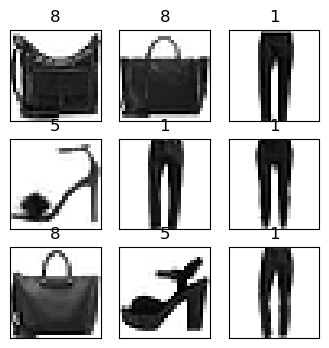

In [2826]:
import tensorflow as tf

# Get the values corresponding to the predicted labels for each sample
predicted_values_tf = tf.reduce_max(predictions_tf, axis=1)

# Get the indices of the samples with the highest predicted values
most_confident_indices_tf = tf.argsort(predicted_values_tf, direction='DESCENDING').numpy()[:9]

# Get the 9 most confident samples
most_confident_samples_tf = X_test[most_confident_indices_tf]

# Get the true labels for the 9 most confident samples
most_confident_labels_tf = np.argmax(y_test_cat[most_confident_indices_tf], axis=1)

# Plot the 9 most confident samples
fig, axes = plt.subplots(3, 3, figsize=(4, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(most_confident_samples_tf[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"{most_confident_labels_tf[i]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [2827]:
from keras.layers import Conv2D, MaxPooling1D, Flatten, Dense
from keras.layers import MaxPooling2D, Dropout

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Create a simple CNN model
model2 = Sequential()
# Convolutional layer: learns spatial features (like edges, textures)

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1 )))
# Added pulling layer
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())

 # Fully connected layer
model2.add(Dense(128, activation='relu')) # 128 neurons, ReLU activation
# outer Layer
model2.add(Dense(10, activation='softmax'))


c:\Users\Uma\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2828]:
# Train the model
# Adam optimizer
from tensorflow.keras.optimizers import Adam
optimiser = Adam()
model2.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimiser, # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [2829]:
# Evaluate the model
model2.fit(
    X_train, # Training data
    y_train_cat, # Training labels
    epochs=20, # Number of epochs
    batch_size=100, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8320 - loss: 0.4792 - val_accuracy: 0.8719 - val_loss: 0.3661
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8883 - loss: 0.3162 - val_accuracy: 0.8922 - val_loss: 0.3074
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9037 - loss: 0.2721 - val_accuracy: 0.8993 - val_loss: 0.2847
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9129 - loss: 0.2430 - val_accuracy: 0.9063 - val_loss: 0.2622
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9217 - loss: 0.2173 - val_accuracy: 0.9046 - val_loss: 0.2697
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9285 - loss: 0.1980 - val_accuracy: 0.9103 - val_loss: 0.2522
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9349 - loss: 0.1812 - val_accuracy: 0.9119 - val_loss: 0.2546
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9395 - loss: 0.1656 - val_acc

In [2830]:
# evalute accuracy
test_loss, test_acc = model2.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss*100:.2f}%')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9117 - loss: 0.3591
Loss:     35.91%
Accuracy: 91.17%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [2831]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [2832]:
# A. Test Hyperparameters
# Hyper parameter values
filter_values = [16, 32, 64]  # diffrent filters to count test
results = {}
# Loop over diffrent filters values
for filters in filter_values:
    print(f'\nTraining model with {filters} filters')
     


Training model with 16 filters

Training model with 32 filters

Training model with 64 filters


In [2833]:
# with filter
model3 = Sequential()

# Added pulling layer

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(2, 2))

model3.add(Conv2D(32* 2, (3, 3), activation='relu')) # Increase filters in subsequent layer
model3.add(MaxPooling2D(2, 2))
model3.add(Flatten())

 # Fully connected layer
model3.add(Dense(128, activation='relu')) # 128 neurons, ReLU activation

# outer Layer
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_407"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_148 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_145               │ (None, 13, 13, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_149 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_146               │ (None, 5, 5, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_244 (Flatten)           │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_669 (Dense)               │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_670 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [2834]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

optimiser = Adam()

model3.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimiser, # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [2835]:
# Evaluate the model
model3.fit(
    X_train, # Training data
    y_train_cat, # Training labels
    epochs=10, # Number of epochs
    batch_size=80, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8023 - loss: 0.5446 - val_accuracy: 0.8568 - val_loss: 0.3938
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8724 - loss: 0.3526 - val_accuracy: 0.8830 - val_loss: 0.3285
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8889 - loss: 0.3071 - val_accuracy: 0.8897 - val_loss: 0.3027
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8998 - loss: 0.2758 - val_accuracy: 0.8991 - val_loss: 0.2795
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9091 - loss: 0.2495 - val_accuracy: 0.8987 - val_loss: 0.2775
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9152 - loss: 0.2307 - val_accuracy: 0.9076 - val_loss: 0.2559
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9238 - loss: 0.2090 - val_accuracy: 0.9086 - val_loss: 0.2576
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9291 - loss: 0.1924 - 

In [2836]:
# evalute accuracy
test_loss, test_acc = model3.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss*100:.2f}%')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9070 - loss: 0.2706
Loss:     27.06%
Accuracy: 90.70%


Addition of filter got better accuracy , but may be over fitting taking longer time to procrss

Now test accuracy with dropot rate 

In [2837]:
dropout_rates = [0.0, 0.5] # 0.0 for no dropout, 0.5 for dropout
regularization_results = {}
print("\n--- Testing Regularization (Dropout) ---")
for dropout_rate in dropout_rates:
    print(f"\nTraining with Dropout rate: {dropout_rate}...")


--- Testing Regularization (Dropout) ---

Training with Dropout rate: 0.0...

Training with Dropout rate: 0.5...


In [2838]:
# with drop out 0.0
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model4 = Sequential()
dropout_rate = 0.0
# Added pulling layer

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(MaxPooling2D(2, 2))
model4.add(Flatten())
model4.add(Dropout(dropout_rate))
 # Fully connected layer
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(dropout_rate))

# outer Layer
model4.add(Dense(10, activation='softmax'))


In [2839]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

optimiser = Adam()

model4.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimiser, # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [2840]:
# Evaluate the model
history = model4.fit(
          X_train, # Training data
          y_train_cat, # Training labels
          epochs=10, # Number of epochs
          batch_size=80,  # Number of samples per batch
          validation_split=0.2 # Use 20% of the data for validation
)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8450 - loss: 0.4457 - val_accuracy: 0.8838 - val_loss: 0.3249
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8949 - loss: 0.2972 - val_accuracy: 0.8960 - val_loss: 0.2919
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9087 - loss: 0.2531 - val_accuracy: 0.9030 - val_loss: 0.2711
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9183 - loss: 0.2229 - val_accuracy: 0.8999 - val_loss: 0.2733
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9280 - loss: 0.1973 - val_accuracy: 0.9112 - val_loss: 0.2594
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9355 - loss: 0.1756 - val_accuracy: 0.9153 - val_loss: 0.2388
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9424 - loss: 0.1566 - val_accuracy: 0.9137 - val_loss: 0.2505
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9484 - loss: 0.1395 - 

In [2841]:
# evalute accuracy (Training Accuracy) in dropout rate 0.0

test_loss, test_acc = model4.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss*100:.2f}%')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.2709
Loss:     27.09%
Accuracy: 91.35%


In [2842]:
# evalute validation accuracy in dropout rate 0.0

val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f'Validation Loss: {val_loss*100:.2f}%')
print(f'Validation Accuracy: {val_acc*100:.2f}%')

Validation Loss: 26.25%
Validation Accuracy: 91.68%


In [2843]:
# with drop outrate(0.5)
model5 = Sequential()
dropout_rate = 0.5

# Added pulling layer

model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(MaxPooling2D(2, 2))
model5.add(Flatten())

 # Fully connected layer
model5.add(Dense(128, activation='relu'))
model4.add(Dropout(dropout_rate))


# outer Layer
model5.add(Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_409"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_151 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_148               │ (None, 13, 13, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_246 (Flatten)           │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_673 (Dense)               │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_674 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [2844]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

optimiser = Adam()

model5.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimiser, # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [2845]:
# Evaluate the model 5
history = model5.fit(
          X_train, # Training data
          y_train_cat, # Training labels
          epochs=10, # Number of epochs
          batch_size=80, # Number of samples per batch
          validation_split=0.2 # Use 20% of the data for validation
)

Epoch 1/10


600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8450 - loss: 0.4453 - val_accuracy: 0.8764 - val_loss: 0.3449
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8938 - loss: 0.3017 - val_accuracy: 0.8925 - val_loss: 0.3044
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9074 - loss: 0.2595 - val_accuracy: 0.8992 - val_loss: 0.2865
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9168 - loss: 0.2288 - val_accuracy: 0.9020 - val_loss: 0.2778
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9277 - loss: 0.2012 - val_accuracy: 0.9100 - val_loss: 0.2624
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9340 - loss: 0.1807 - val_accuracy: 0.9107 - val_loss: 0.2534
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9402 - loss: 0.1630 - val_accuracy: 0.9027 - val_loss: 0.2741
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9480 - loss: 0.1431 - val_accurac

In [2846]:
# evalute training accuracy in dropout rate 0.5
test_loss, test_acc = model5.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss*100:.2f}%')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9122 - loss: 0.2769
Loss:     27.69%
Accuracy: 91.22%


In [2847]:
# evalute Validation accuracy in dropout rate 0.5
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f'Validation Loss: {val_loss*100:.2f}%')
print(f'Validation Accuracy: {val_acc*100:.2f}%')

Validation Loss: 26.84%
Validation Accuracy: 91.37%


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here** By changing dropout rate training accuracy not affected, but validation loss is less in dropout rate 0.5 than dropout rate 0.0. Validation loss is close to training loss in dropout rate 0.5 model.
Therefore, Model with dropout rate 0.5 is doing good generalization.
     


# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [2848]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [2849]:
# with filter
model6 = Sequential()
dropout_rate = 0.5
filter_values = [32]  # diffrent filters to count test
results = {}

# Added pulling layer

model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model6.add(MaxPooling2D(2, 2))


model6.add(Flatten())

 # Fully connected layer
model6.add(Dense(128, activation='relu')) # 128 neurons, ReLU activation
model6.add(Dropout(dropout_rate))

# outer Layer
model6.add(Dense(10, activation='softmax'))
model6.summary()

Model: "sequential_410"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_152 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_149               │ (None, 13, 13, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_247 (Flatten)           │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_675 (Dense)               │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_676 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [2850]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

optimiser = Adam()

model6.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=optimiser, # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [2851]:
# Evaluate the model 5
history = model6.fit(
          X_train, # Training data
          y_train_cat, # Training labels
          epochs=10, # Number of epochs
          batch_size=80, # Number of samples per batch
          validation_split=0.2 # Use 20% of the data for validation
          )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7974 - loss: 0.5819 - val_accuracy: 0.8700 - val_loss: 0.3630
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8636 - loss: 0.3890 - val_accuracy: 0.8892 - val_loss: 0.3064
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8804 - loss: 0.3372 - val_accuracy: 0.8931 - val_loss: 0.2942
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8910 - loss: 0.3087 - val_accuracy: 0.9017 - val_loss: 0.2738
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8977 - loss: 0.2869 - val_accuracy: 0.9052 - val_loss: 0.2619
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9037 - loss: 0.2675 - val_accuracy: 0.9080 - val_loss: 0.2571
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9066 - loss: 0.2544 - val_accuracy: 0.9098 - val_loss: 0.2478
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9124 - loss: 0.2425 - 

In [2852]:
# evalute training accuracy 
test_loss, test_acc = model6.evaluate(X_test, y_test_cat, )
print(f'Loss:     {test_loss*100:.2f}%')
print(f'Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9043 - loss: 0.2605
Loss:     26.05%
Accuracy: 90.43%


In [2853]:
# evalute Validation accuracy 
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f'Validation Loss: {val_loss*100:.2f}%')
print(f'Validation Accuracy: {val_acc*100:.2f}%')

Validation Loss: 24.45%
Validation Accuracy: 91.13%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
Base line Model  Accuracy = ~ 85% while CNN Model Accuracy = 91.10%
Addition of drop out rate, with not overfitted filter value , high epoch number and batch size made . 
Final model is learning correctly.
Validation loss and training loss values are close and improve smoothly. Indicate model is not overfitting.

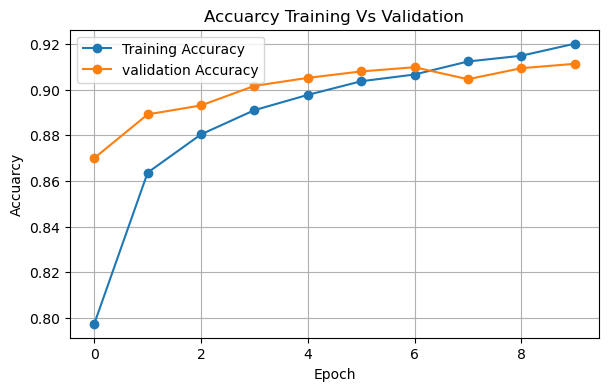

In [2854]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], marker="o", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], marker="o", label="validation Accuracy")
plt.title('Accuarcy Training Vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuarcy')
plt.legend()
plt.grid(True)

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.